# NBA Web Scraping

## Step 1. Scrape the web using BeautifulSoup and collect data w/ cleaning steps

In [1]:
# Data collected from www.basketball-reference.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
# what year should we analyze? How about 2019 season
year = 2019

# establish base url
base_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)

# pass site to bs4 and store in object
html = urlopen(base_url)
soup = BeautifulSoup(html)

In [3]:
# inspect the page html and determine which <tr> we pull headers from
soup.findAll('tr', limit=2)

# extract header values into list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# skip first column (unneeded)
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [4]:
# skipping the header row, list comprehension to extract data
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

In [5]:
# save to dataframe
stats = pd.DataFrame(player_stats, columns = headers)
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


# Cleaning steps

In [6]:
# drop excess header rows
clean_df = stats.drop(stats[stats.Age == 'Age'].index)
len(clean_df)

734

In [7]:
stats.Age.unique()

array(['25', '28', '22', '21', '33', '23', '20', '26', '30', '24', '34',
       None, '31', '19', '32', '29', '27', '37', '42', '36', '38', '35',
       '40'], dtype=object)

In [12]:
# Notice how there is a broken row every 22 entries...
stats.iloc[22:30]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23,OG Anunoby,SF,21,TOR,67,6,20.2,2.7,6.0,.453,...,.581,0.9,2.1,2.9,0.7,0.7,0.3,0.8,2.1,7.0
24,Ryan Arcidiacono,PG,24,CHI,81,32,24.2,2.3,5.2,.447,...,.873,0.3,2.4,2.7,3.3,0.8,0.0,0.8,2.1,6.7
25,Trevor Ariza,SF,33,TOT,69,69,34.0,4.3,10.7,.399,...,.793,0.7,4.7,5.4,3.7,1.3,0.3,1.5,1.9,12.5
26,Trevor Ariza,SF,33,PHO,26,26,34.0,3.3,8.7,.379,...,.837,0.6,5.0,5.6,3.3,1.5,0.3,1.5,1.7,9.9
27,Trevor Ariza,SF,33,WAS,43,43,34.1,4.8,11.8,.409,...,.777,0.8,4.5,5.3,3.8,1.2,0.3,1.6,2.0,14.1
28,D.J. Augustin,PG,31,ORL,81,81,28.0,3.9,8.4,.470,...,.866,0.5,2.0,2.5,5.3,0.6,0.0,1.6,1.4,11.7
29,Deandre Ayton,C,20,PHO,71,70,30.7,7.2,12.3,.585,...,.746,3.1,7.1,10.3,1.8,0.9,0.9,1.8,2.9,16.3


In [15]:
# drop blank rows 
stats.replace('-', np.nan, inplace=True)
clean_stats = stats.dropna()
clean_stats.shape

(708, 29)

In [18]:
# write to .csv file
clean_stats.to_csv('NBA_2019.csv', index=False)


In [22]:
# read in .csv in order to bring in correct dtypes
clean_stats = pd.read_csv('NBA_2019.csv')
clean_stats.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

# Step 2. Ask questions of the data

In [23]:
# which player scored the highest PTS per game
clean_stats[clean_stats.PTS == clean_stats.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


In [24]:
# show me the players with more than 20 PTS per game
clean_stats[clean_stats.PTS > 20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
47,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,0.475,...,0.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
68,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,0.467,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
103,Jimmy Butler,SG,29,MIN,10,10,36.1,7.4,15.7,0.471,...,0.787,1.6,3.6,5.2,4.3,2.4,1.0,1.4,1.8,21.3
143,Mike Conley,PG,31,MEM,70,70,33.5,7.0,16.0,0.438,...,0.845,0.6,2.8,3.4,6.4,1.3,0.3,1.9,1.8,21.1
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
161,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,...,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9
174,DeMar DeRozan,SG,29,SAS,77,77,34.9,8.2,17.1,0.481,...,0.830,0.7,5.3,6.0,6.2,1.1,0.5,2.6,2.3,21.2
181,Luka Dončić,SG,19,DAL,72,72,32.2,7.0,16.5,0.427,...,0.713,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2


In [26]:
# who had the greatest 3P field goals per game
clean_stats[clean_stats['3P'] == clean_stats['3P'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3


In [27]:
# who had the most assists per game(AST)
clean_stats[clean_stats['AST'] == clean_stats['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
675,Russell Westbrook,PG,30,OKC,73,73,36.0,8.6,20.2,0.428,...,0.656,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9


### Use GroupBy to answer more specific questions

In [28]:
# which player scored the most points from PHI
PHI = clean_stats.groupby('Tm').get_group('PHI')
PHI[PHI.PTS == PHI.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
200,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,0.484,...,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5


In [31]:
# which of the 5 positions scores the highest PTS per game
positions = ['C', 'PF', 'SF', 'PG', 'SG']
POS = clean_stats[ clean_stats['Pos'].isin(positions) ]
POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
PF,147.0,7.703401,5.622380,0.0,3.350,6.30,11.100,27.7
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6


### Histograms

In [34]:
# make a reduced df to make it simple: PTS per game vs Pos
PTS = clean_stats[['Pos', 'PTS']]

positions = ['C', 'PF', 'SF', 'PG', 'SG']
PTS = PTS[ PTS['Pos'].isin(positions) ]
PTS

,Pos,PTS
0,SG,5.3
1,PF,1.7
2,PG,3.2
3,C,13.9
4,C,8.9
...,...,...
703,C,11.5
704,C,7.8
705,C,8.9
706,C,8.5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FD1169128>,
      dtype=object)

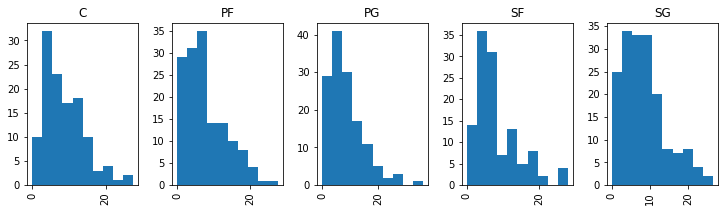

In [37]:
# Pandas histogram
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(12,3))

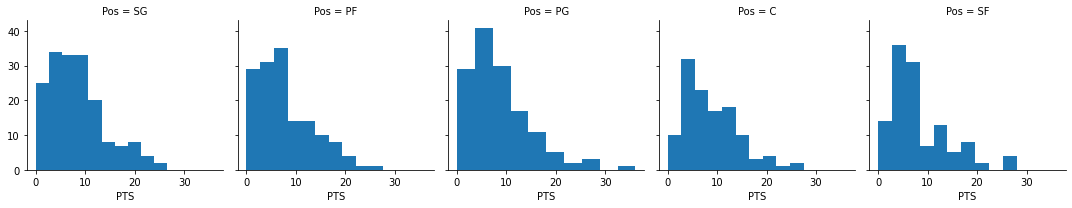

In [38]:
# Seaborn histogram
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS, col="Pos")
g.map(plt.hist, 'PTS')

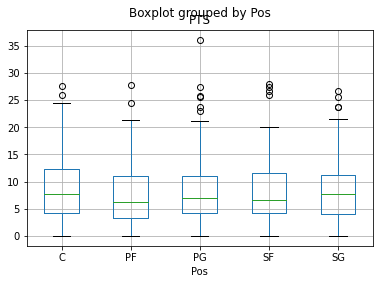

In [40]:
# Pandas boxplot
PTS.boxplot(column='PTS', by='Pos')

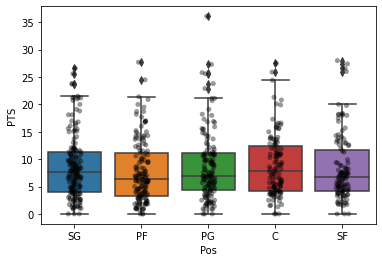

In [41]:
# Seaborn boxplot
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS)
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
             jitter=True,
             marker='o',
             alpha=0.4,
             color='black')

# Heatmap

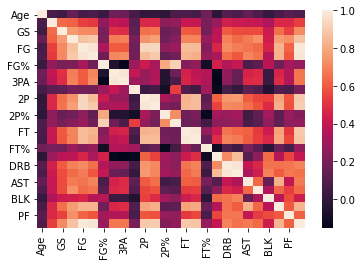

In [43]:
corr = clean_stats.corr()
sns.heatmap(corr)

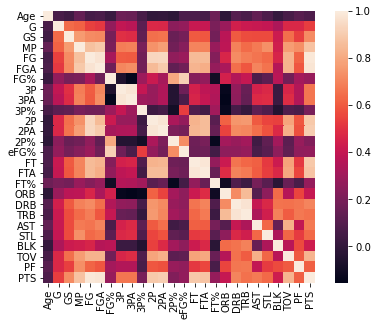

In [44]:
# make adjustments
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

In [45]:
# make scatterplot grid
selections = ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
dfs = clean_stats[selections]
dfs

,Age,G,STL,BLK,AST,PTS
0,25,31,0.5,0.2,0.6,5.3
1,28,10,0.1,0.4,0.8,1.7
2,22,34,0.4,0.1,1.9,3.2
3,25,80,1.5,1.0,1.6,13.9
4,21,82,0.9,0.8,2.2,8.9
...,...,...,...,...,...,...
703,29,4,0.3,0.8,0.8,11.5
704,22,59,0.2,0.4,0.9,7.8
705,21,59,0.2,0.9,1.1,8.9
706,21,33,0.1,0.8,0.8,8.5


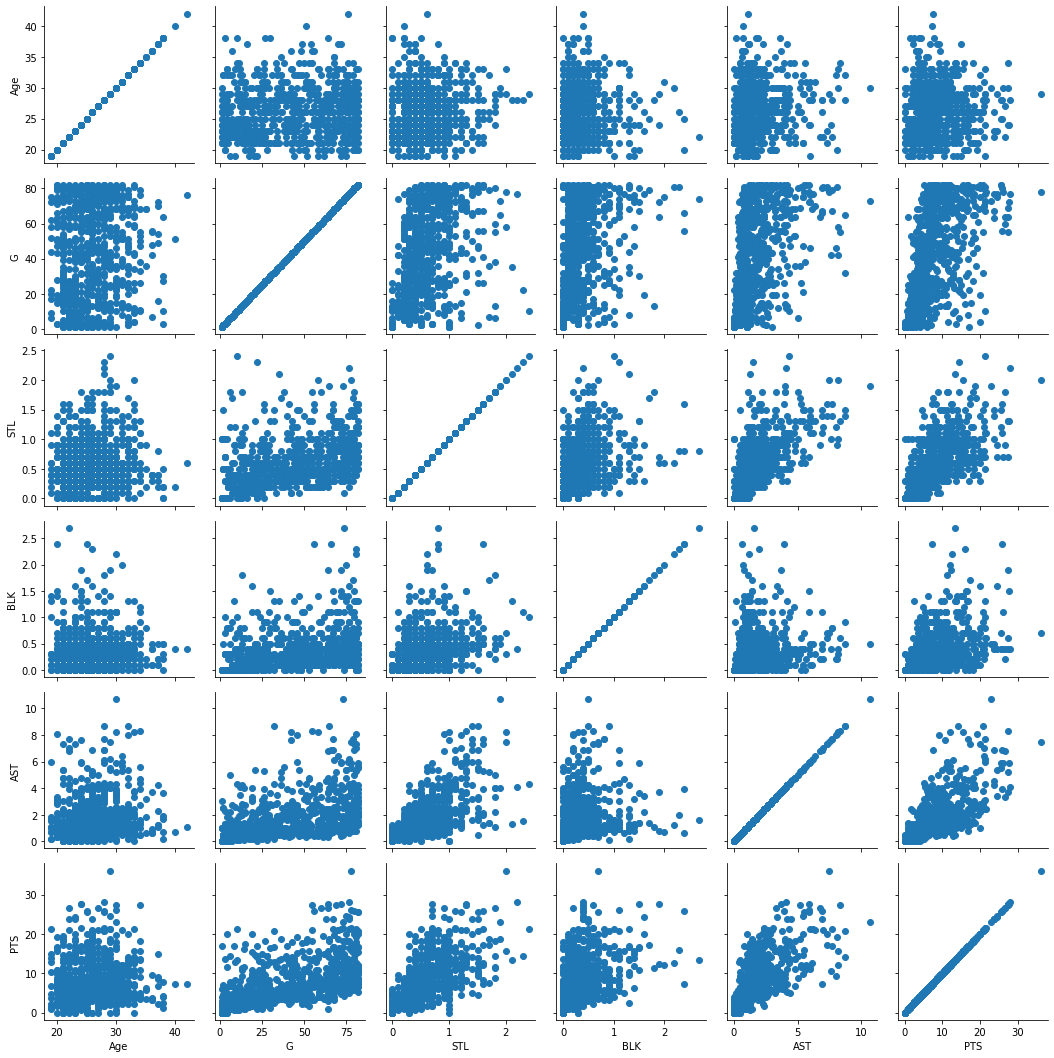

In [46]:
g = sns.PairGrid(dfs)
g.map(plt.scatter)